In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-08-29 09:57:15.793466


### Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

We'll download the `pizza_steak` subset .zip file and unzip it.

In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-29 09:57:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.250.4.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.8MB/s    in 5.6s    

2023-08-29 09:57:21 (18.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_steak_images_train

750

In [8]:
# Another way to find out how many images are in a file
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/") # Turn our training into python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

In [9]:
# View an image
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read image and plot it using matplotlib
  img  = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}") # show the shape of the image
  return img

Image Shape: (384, 512, 3)


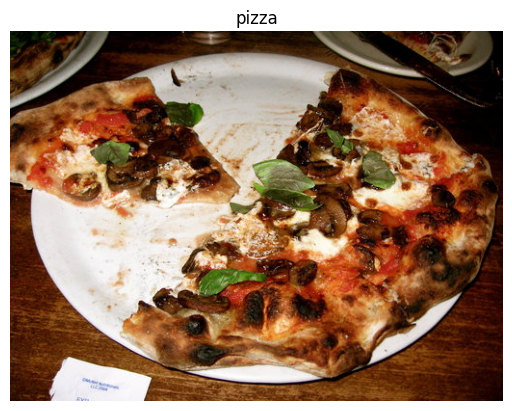

In [32]:
# View a random image from the training dataset
img = view_random_image("pizza_steak/train/", "pizza")

In [11]:
# View the img (actually just a big array/tensor)
img

array([[[ 15,  15,  17],
        [ 15,  15,  17],
        [ 12,  12,  14],
        ...,
        [180, 169, 167],
        [138, 128, 129],
        [ 90,  79,  83]],

       [[ 18,  18,  20],
        [ 17,  17,  19],
        [ 12,  12,  14],
        ...,
        [168, 157, 155],
        [120, 110, 111],
        [ 73,  62,  66]],

       [[ 18,  18,  20],
        [ 18,  18,  20],
        [ 12,  12,  14],
        ...,
        [157, 145, 145],
        [105,  95,  96],
        [ 62,  53,  56]],

       ...,

       [[  6,   9,   2],
        [  5,   8,   1],
        [  5,   7,   2],
        ...,
        [ 72,  83,  79],
        [ 70,  80,  79],
        [ 67,  79,  79]],

       [[  8,  11,   4],
        [  7,  10,   3],
        [  6,   8,   3],
        ...,
        [ 77,  90,  83],
        [ 76,  88,  86],
        [ 67,  81,  81]],

       [[  7,  10,   3],
        [  7,  10,   3],
        [  5,   7,   2],
        ...,
        [ 69,  82,  75],
        [ 67,  82,  79],
        [ 70,  84,  84]]

In [12]:
# View the image shape
img.shape

(382, 512, 3)

In [13]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.05882353, 0.05882353, 0.06666667],
        [0.05882353, 0.05882353, 0.06666667],
        [0.04705882, 0.04705882, 0.05490196],
        ...,
        [0.70588235, 0.6627451 , 0.65490196],
        [0.54117647, 0.50196078, 0.50588235],
        [0.35294118, 0.30980392, 0.3254902 ]],

       [[0.07058824, 0.07058824, 0.07843137],
        [0.06666667, 0.06666667, 0.0745098 ],
        [0.04705882, 0.04705882, 0.05490196],
        ...,
        [0.65882353, 0.61568627, 0.60784314],
        [0.47058824, 0.43137255, 0.43529412],
        [0.28627451, 0.24313725, 0.25882353]],

       [[0.07058824, 0.07058824, 0.07843137],
        [0.07058824, 0.07058824, 0.07843137],
        [0.04705882, 0.04705882, 0.05490196],
        ...,
        [0.61568627, 0.56862745, 0.56862745],
        [0.41176471, 0.37254902, 0.37647059],
        [0.24313725, 0.20784314, 0.21960784]],

       ...,

       [[0.02352941, 0.03529412, 0.00784314],
        [0.01960784, 0.03137255, 0.00392157],
        [0.01960784, 0

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# Set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel values between 1 & 0, also called Scalling/Normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up train and test directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import the data from the directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32, # Number of images process at a time
                                               target_size = (224, 224), # Converts all images to 224 x 224
                                               class_mode = "binary", # Type of problem we are working with
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Create a CNN model

In [16]:
# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3, # can also be (3, 3)
                           activation = "relu",
                           input_shape = (224, 224, 3)), # First layer specifies input shape (height, weight and color channels)
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, # Pool size can also be (2, 2)
                              padding = "valid"), # Padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 24s 143ms/step - loss: 0.5466 - accuracy: 0.7213 - val_loss: 0.3977 - val_accuracy: 0.8520
Epoch 2/5
47/47 [==============================] - 8s 167ms/step - loss: 0.4357 - accuracy: 0.8067 - val_loss: 0.3636 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3964 - accuracy: 0.8273 - val_loss: 0.3196 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3685 - accuracy: 0.8467 - val_loss: 0.3369 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.3427 - accuracy: 0.8593 - val_loss: 0.3908 - val_accuracy: 0.8220


with only 5 epochs we have acheived 85% accuracy

In [17]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Using the same model as before
To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

In [18]:
# Set the seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data =valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 128ms/step - loss: 0.8995 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6933 - accuracy: 0.4693 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000


our model ran but it doesn't seem like it learned anything. It only reaches 48% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

In [19]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


 One of the most noticeable things here is the much larger number of parameters in `model_2`versus `model_1.`

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`

### Increasing number of layers and neurons per unit

In [24]:
# Set random Seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 129ms/step - loss: 2.4904 - accuracy: 0.6253 - val_loss: 2.2712 - val_accuracy: 0.5080
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.7271 - accuracy: 0.7080 - val_loss: 0.4561 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.5551 - accuracy: 0.7347 - val_loss: 0.5141 - val_accuracy: 0.7540
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4757 - accuracy: 0.7820 - val_loss: 0.4719 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.5306 - accuracy: 0.7713 - val_loss: 0.4375 - val_accuracy: 0.7680


In [25]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_20 (Dense)            (None, 100)               15052900  
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


he number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

Image Shape: (384, 512, 3)
Image Shape: (512, 512, 3)


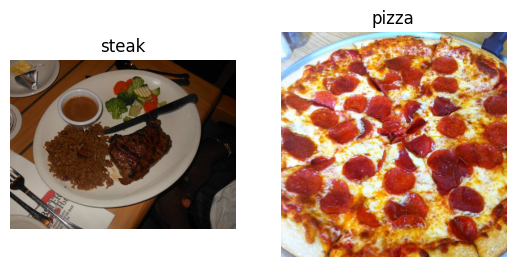

In [27]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [33]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [35]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.227451  , 0.21176472, 0.20000002],
          [0.2784314 , 0.26666668, 0.24705884],
          [0.18823531, 0.1764706 , 0.14901961],
          ...,
          [0.60784316, 0.6431373 , 0.67058825],
          [0.6117647 , 0.64705884, 0.6745098 ],
          [0.59607846, 0.6392157 , 0.6627451 ]],
 
         [[0.16862746, 0.15294118, 0.14117648],
          [0.3019608 , 0.2901961 , 0.27058825],
          [0.34901962, 0.3372549 , 0.30980393],
          ...,
          [0.5882353 , 0.63529414, 0.68235296],
          [0.5764706 , 0.62352943, 0.67058825],
          [0.5882353 , 0.63529414, 0.68235296]],
 
         [[0.18823531, 0.17254902, 0.16078432],
          [0.25490198, 0.24313727, 0.22352943],
          [0.33333334, 0.32156864, 0.29411766],
          ...,
          [0.5921569 , 0.6313726 , 0.6784314 ],
          [0.5921569 , 0.62352943, 0.6745098 ],
          [0.5921569 , 0.6156863 , 0.67058825]],
 
         ...,
 
         [[0.01568628, 0.01568628, 0.01568628],
          [0.01568

In [36]:
# View the first batch of labels
labels

array([0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.],
      dtype=float32)

In [44]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [45]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Due to the `class_mode` parameter being `'binary'` our labels are either `0` (pizza) or `1` (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.

## Create a model (start with a baseline)

In [46]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [53]:
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [54]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [55]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [56]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [57]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(valid_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
16/16 [==============================] - 6s 276ms/step - loss: 6.3163 - accuracy: 0.5866 - val_loss: 1.9365 - val_accuracy: 0.6240
Epoch 2/5
16/16 [==============================] - 4s 260ms/step - loss: 0.9980 - accuracy: 0.6348 - val_loss: 0.5877 - val_accuracy: 0.7340
Epoch 3/5
16/16 [==============================] - 3s 172ms/step - loss: 0.5429 - accuracy: 0.7480 - val_loss: 0.4336 - val_accuracy: 0.8200
Epoch 4/5
16/16 [==============================] - 4s 231ms/step - loss: 0.4444 - accuracy: 0.8091 - val_loss: 0.4050 - val_accuracy: 0.8260
Epoch 5/5
16/16 [==============================] - 3s 176ms/step - loss: 0.3883 - accuracy: 0.8477 - val_loss: 0.3795 - val_accuracy: 0.8280


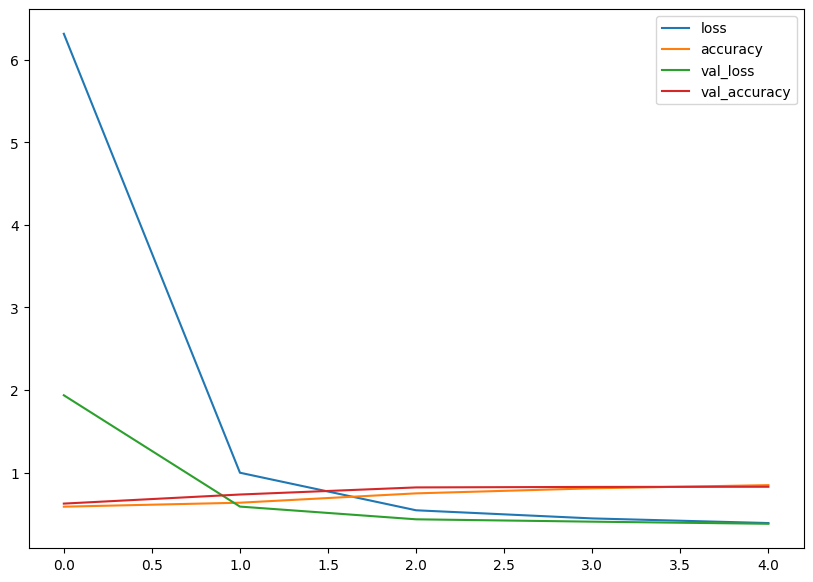

In [59]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7));

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [60]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

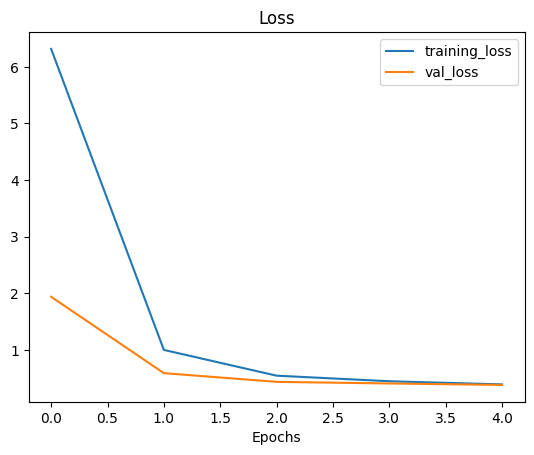

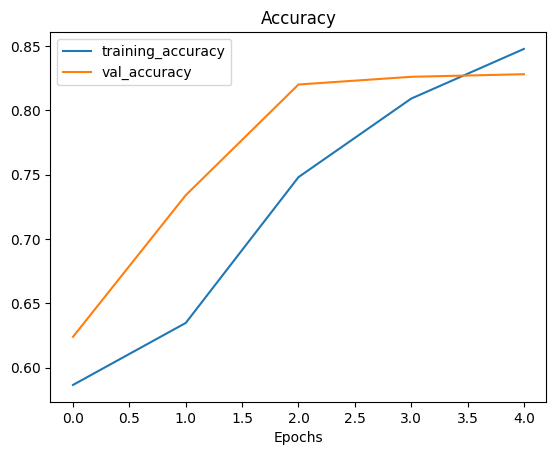

In [61]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [62]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_12 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_9 (Flatten)         (None, 475240)            0         
                                                                 
 dense_26 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 6. Adjust the model parameters

In [63]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [64]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [65]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 207ms/step - loss: 0.6299 - accuracy: 0.6487 - val_loss: 0.4729 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 0.4541 - accuracy: 0.7940 - val_loss: 0.3625 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.3942 - accuracy: 0.8313 - val_loss: 0.3295 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 5s 106ms/step - loss: 0.3833 - accuracy: 0.8387 - val_loss: 0.3671 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 6s 138ms/step - loss: 0.3671 - accuracy: 0.8413 - val_loss: 0.3202 - val_accuracy: 0.8780


In [66]:
# Check out the model architecture
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)     

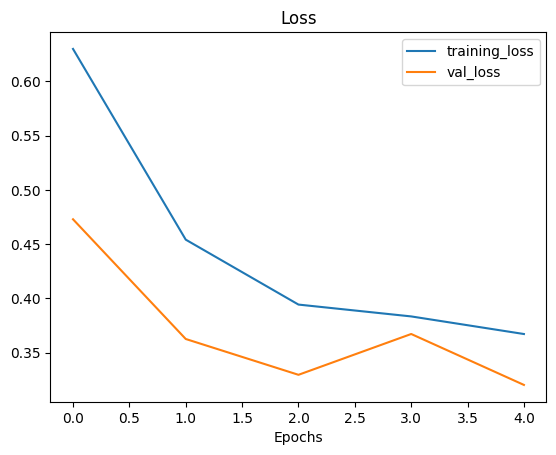

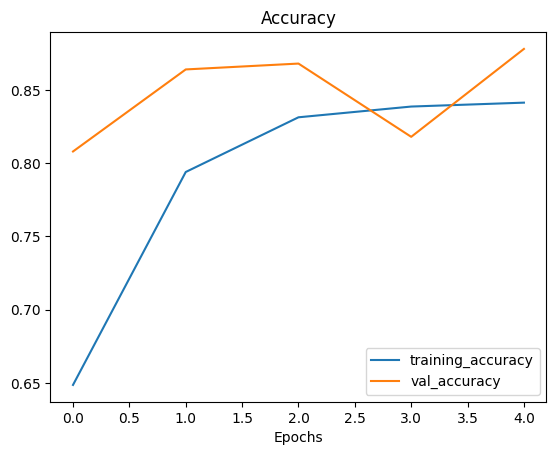

In [67]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

### Implement data augmentation

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

In [68]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20, # rotate the image slightly between 0 and 20 degrees
                                             shear_range = 0.2, # shear the image
                                             zoom_range = 0.2, # zoom into the image
                                             width_shift_range = 0.2, # shift the image width ways
                                             height_shift_range = 0.2, # shift the image height ways
                                             horizontal_flip = True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [69]:
# Import data and augment it from training directory
print("Augmented training images:")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = False)

# Create the Non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [70]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

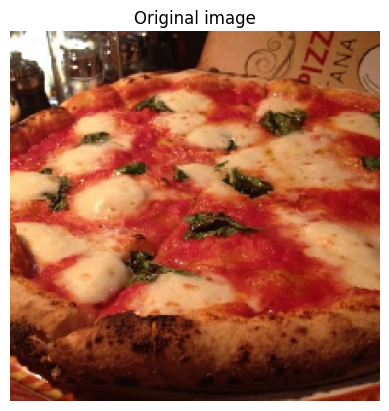

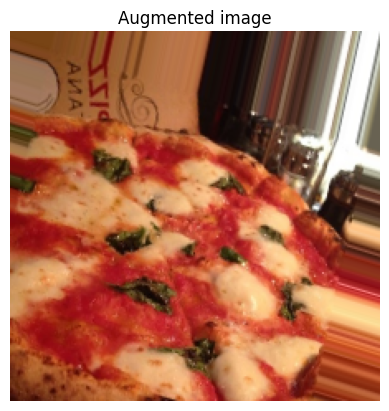

In [74]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [75]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 500ms/step - loss: 0.7062 - accuracy: 0.4887 - val_loss: 0.6857 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 22s 479ms/step - loss: 0.6975 - accuracy: 0.5827 - val_loss: 0.7247 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 23s 496ms/step - loss: 0.6987 - accuracy: 0.6067 - val_loss: 0.8231 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 21s 453ms/step - loss: 0.7030 - accuracy: 0.5280 - val_loss: 0.6677 - val_accuracy: 0.7240
Epoch 5/5
47/47 [==============================] - 25s 536ms/step - loss: 0.6768 - accuracy: 0.5893 - val_loss: 0.6342 - val_accuracy: 0.7660


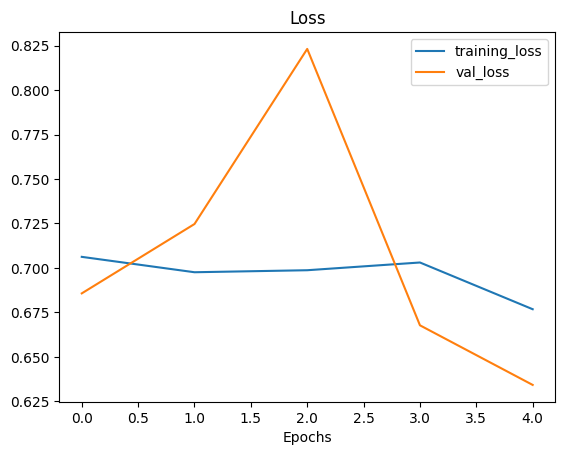

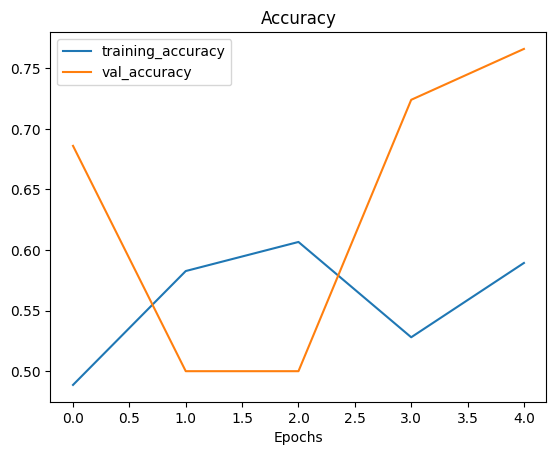

In [76]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [77]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [78]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 521ms/step - loss: 0.6355 - accuracy: 0.6387 - val_loss: 0.4853 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.5375 - accuracy: 0.7313 - val_loss: 0.4692 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4703 - accuracy: 0.7827 - val_loss: 0.3266 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 24s 504ms/step - loss: 0.4506 - accuracy: 0.8060 - val_loss: 0.3178 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4343 - accuracy: 0.8093 - val_loss: 0.3136 - val_accuracy: 0.8840


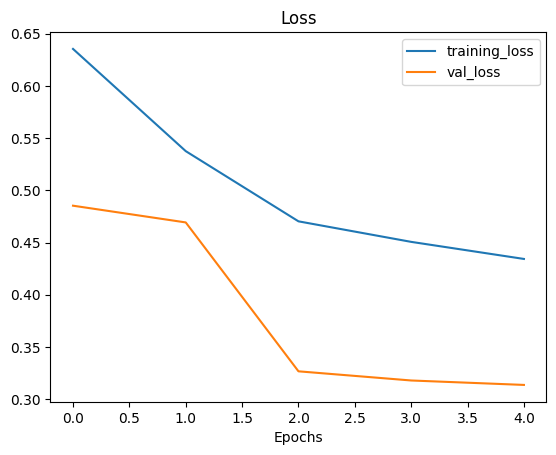

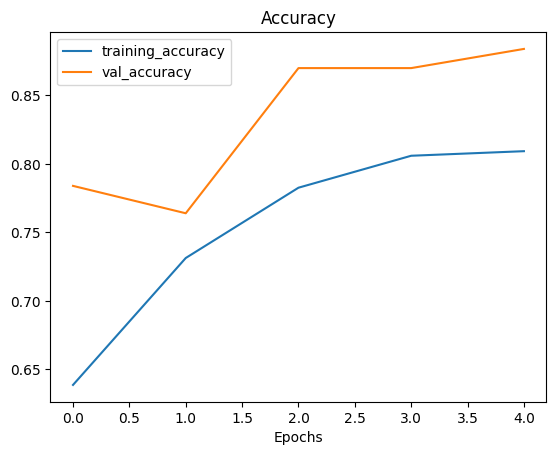

In [79]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

## Repeat until satisified

In [80]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 530ms/step - loss: 0.6516 - accuracy: 0.5867 - val_loss: 0.5298 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 23s 480ms/step - loss: 0.5434 - accuracy: 0.7320 - val_loss: 0.3743 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 23s 490ms/step - loss: 0.5135 - accuracy: 0.7547 - val_loss: 0.3732 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 21s 447ms/step - loss: 0.4931 - accuracy: 0.7653 - val_loss: 0.3549 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 27s 574ms/step - loss: 0.4792 - accuracy: 0.7773 - val_loss: 0.4094 - val_accuracy: 0.8140


In [81]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [82]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_23 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_25 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

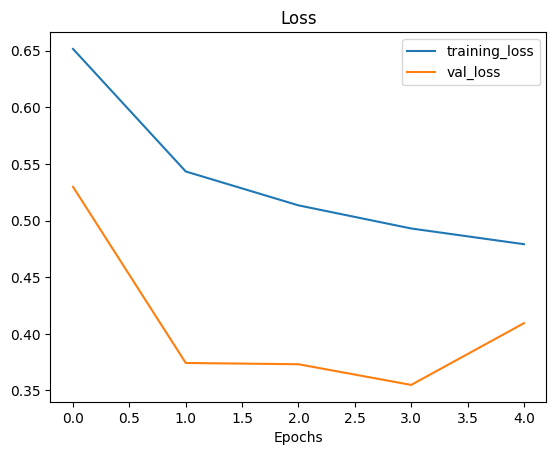

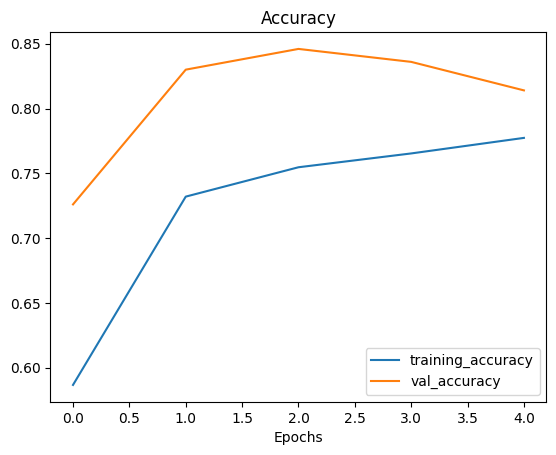

In [83]:
# Check out the model 8 performance
plot_loss_curves(history_8)

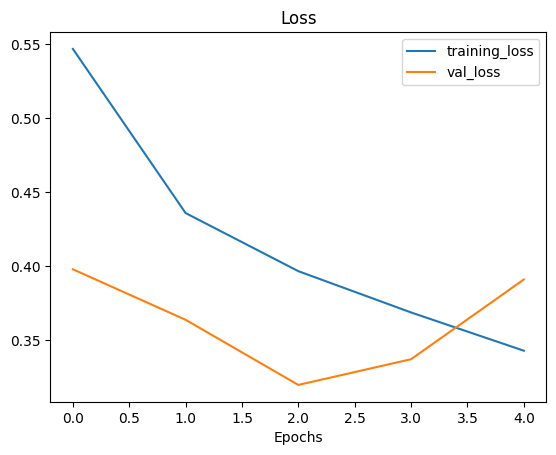

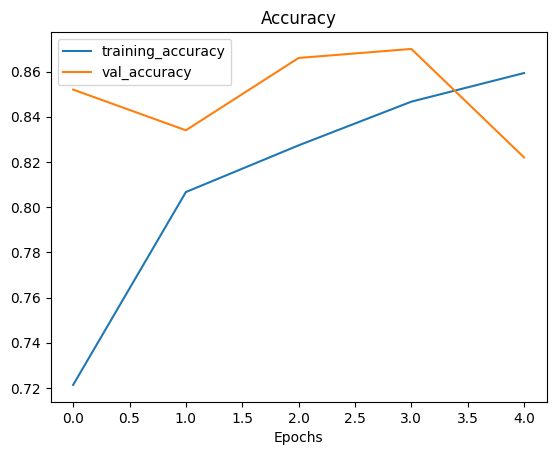

In [84]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

## Making a prediction with our trained model

In [85]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-08-29 10:58:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2023-08-29 10:58:39 (199 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



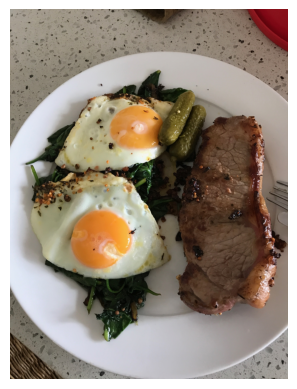

In [86]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [87]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [88]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [89]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [90]:
# Make a prediction on our custom image (spoiler: this won't work)
model_8.predict(steak)

ValueError: ignored

There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims

In [91]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak


Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [92]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 487ms/step


array([[0.9069841]], dtype=float32)

In [93]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [94]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [95]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step


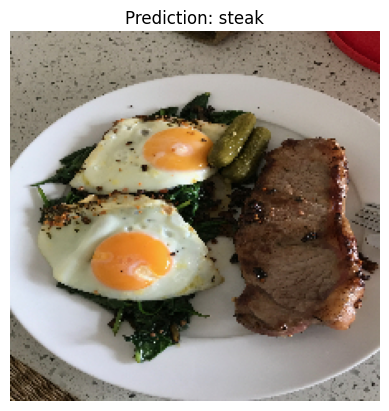

In [96]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 30ms/step


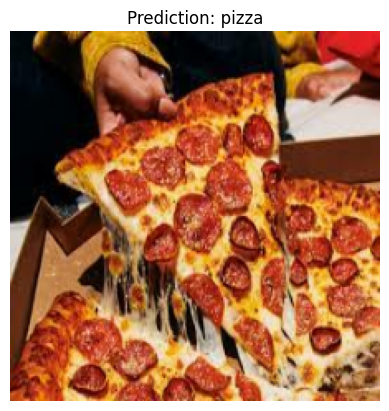

In [97]:
# Predict on our custom images
pred_and_plot(model_8, "pizza-NY.jpg", class_names)

Getting correct predictions